<a href="https://colab.research.google.com/github/wdwzyyg/Dataforcolab/blob/master/bucky_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import os
import math
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('/content/drive/My Drive/ECE532/Activity13Low rank approximation with Bucky/bucky.mat')
A = in_data['A']

##

# Load data for activity: Another option
# A = imageio.imread("Whateveryoulike.png")
# A = np.average(A[:,:,0:3], axis=2)/256

rows, cols = np.array(A.shape)

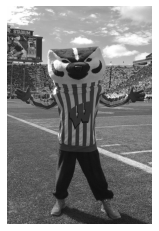

In [3]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

#### 2a)

We can conclude that the approximate rank of A can be around 50 because the singular value is not significant beyond that index. 

Plot of the logarithm of the singular values can provide basic information for selecting right approximation rank. 


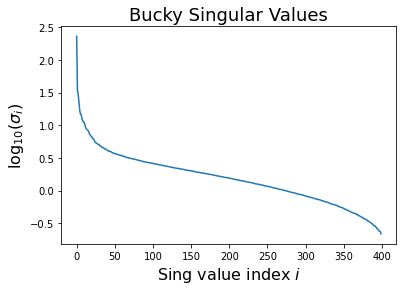

In [4]:
# Bucky's singular values

# Complete and uncomment line below
U,s,VT = np.linalg.svd(A,full_matrices=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Sing value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

#### 2b)

The quality of the approximation is improved as r increases, but the pace of improvement is decreacing. 

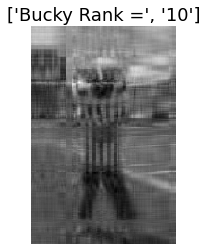

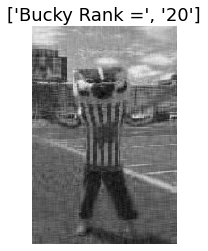

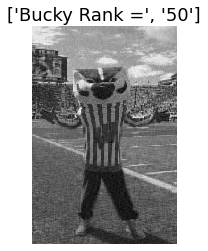

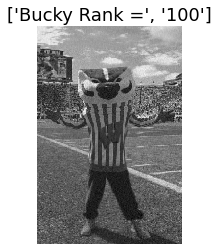

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


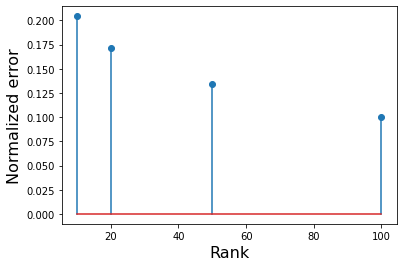

In [15]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i in range(len(r_vals)):
   
    ind = int(r_vals[i]-1)
    # Complete and uncomment two lines below
    r = r_vals[i]
    Ar = U[:, 0:r] @ np.diag(s[0:r]) @ VT[0:r,:]
    Er = U[:,r:] @ np.diag(s[r:]) @ VT[r:,:]
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

#### 2c)

Size of A: $600 \times 400$

Size(A)/Size(rank-r approximation):

r = 10: $(600 \times 400) /(600\times10 + 10 + 10\times400) = 23.98$

r = 20: $(600 \times 400) /(600\times20 + 20 + 20\times400) = 11.88$

r = 50: $(600 \times 400) /(600\times50 + 50 + 50\times400) = 4.79$

r = 100: $(600 \times 400) /(600\times100 + 100 + 100\times400) = 2.40$

#### 2d)



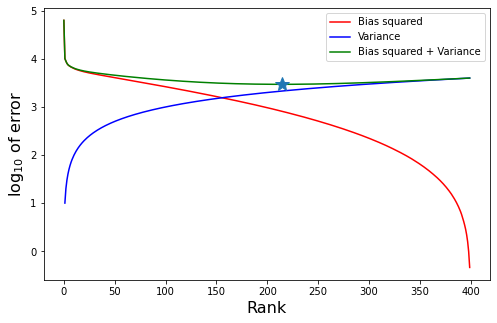

Sigma = 10   Optimum rank =  214 



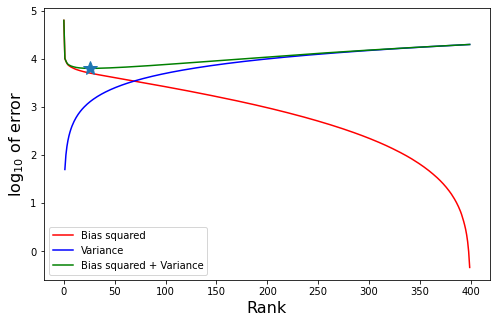

Sigma = 50   Optimum rank =  26 




In [33]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 10
var = sigma2*ranks


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()
print('Sigma = 10   Optimum rank = ',ranks[min_bias_plus_variance_index],'\n')
#######
sigma2 = 50
var = sigma2*ranks


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()
print('Sigma = 50   Optimum rank = ',ranks[min_bias_plus_variance_index],'\n\n')

#### 2e)


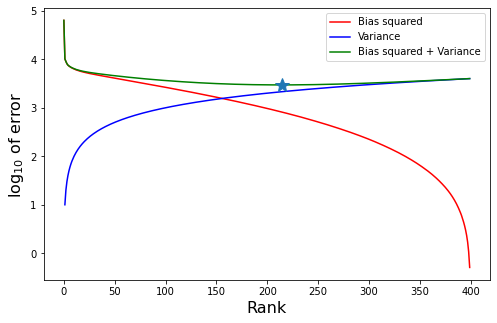

Sigma = 10   Optimum rank of noisy A =  214 



In [35]:
sigma2 = 10
Anoise = A + np.sqrt(sigma2/600)* np.random.randn(np.shape(A)[0], np.shape(A)[1])

U,s,VT = np.linalg.svd(Anoise,full_matrices=False)

num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

var = sigma2*ranks

fig = plt.figure(figsize=((8,5)))
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()
print('Sigma = 10   Optimum rank of noisy A = ',ranks[min_bias_plus_variance_index],'\n')